# Methodology

Before applying Data Science techniques, we can make use of various problem solving methodologies and their tools to decompose problems 

✓ Lean Six Sigma 
✓ TRIZ (Theory of Inventive Problem Solving) 
✓ CRISP-DM 
✓ Design Thinking

# CRISP-DM

ftp://public.dhe.ibm.com/software/analytics/spss/documentation/modeler/18.0/en/ModelerCRISPDM.pdf
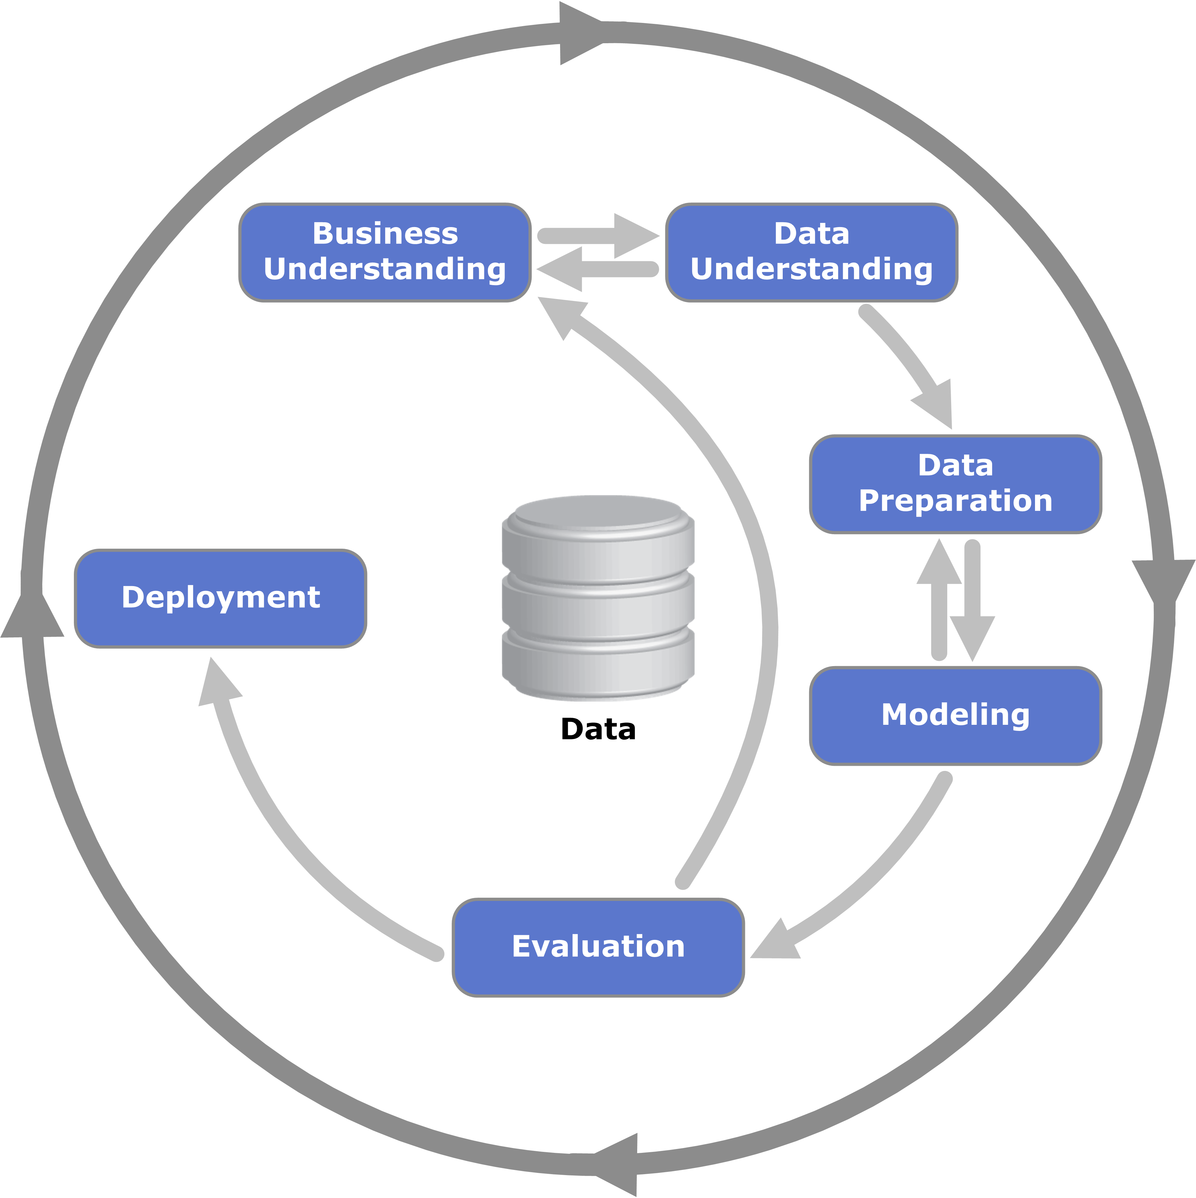

CRISP-DM (CRoss Industry Process for Data Mining) is a process model that describes commonly used approaches that data mining experts use to tackle problems. 
It is a guide that allows data mining projects to be completed faster with higher quality and less resources.
It is an evolutionary and iterative process.

# STEP 1 – BUSINESS UNDERSTANDING

Firstly an in-depth analysis of the business objectives and needs has to be done. Current situation must be accessed and from these insights, the goals of carrying out the processes must be defined. This should follow the setting up of a plan to proceed.
In our case, our aim is maximizing sales. We have sales data that we collect via POS. With that POS location data, we have the information data of that locations.  Using those information, finding most convenient location for consumer could be the possible solution. 


# STEP 2 – DATA UNDERSTANDING

Dataset surroundings.json will give information about 90 different amenities like restaurant, shops, beauty salons etc. that are in the surrounding of each POS.

In [1]:
# library imports
import os   
import json
import math
import operator
from IPython.display import Markdown, display

#pandas
import pandas as pd
from pandas import Series, DataFrame, Panel
from pandas.io.json import json_normalize

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

# plotly
!pip install plotly
import plotly.plotly as py
import plotly.tools as tls
from plotly.graph_objs import *
import plotly


# numpy
import numpy as np
from scipy.sparse import csr_matrix

# sklearn
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score,ShuffleSplit

# treeinterpreter
!pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti, utils

# Scpiy
import scipy as sp
from scipy import sparse

In [2]:
# global variables 
SalesPath = os.path.join('UseCase_3_Datasets','sales_granular.csv')
SurroundingsPath = os.path.join('UseCase_3_Datasets','Surroundings.json')

In [3]:
# check sales data format
with open(SalesPath, 'r') as f:
    print(f.readline()) # headers
    print(f.readline()) # first row

store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,8/3/15 18:00,8/3/15 19:00,8/3/15 22:00,8/4/15 8:00,8/4/15 9:00,8/4/15 10:00,8/4/15 11:00,8/4/15 12:00,8/4/15 13:00,8/4/15 14:00,8/4/15 15:00,8/4/15 16:00,8/4/15 17:00,8/4/15 18:00,8/4/15 19:00,8/4/15 20:00,8/5/15 7:00,8/5/15 9:00,8/5/15 10:00,8/5/15 11:00,8/5/15 12:00,8/5/15 13:00,8/5/15 14:00,8/5/15 15:00,8/5/15 16:00,8/5/15 17:00,8/5/15 18:00,8/5/15 19:00,8/5/15 20:00,8/6/15 9:00,8/6/15 10:00,8/6/15 11:00,8/6/15 12:00,8/6/15 13:00,8/6/15 14:00,8/6/15 15:00,8/6/15 16:00,8/6/15 17:00,8/6/15 18:00,8/6/15 19:00,8/6/15 21:00,8/7/15 6:00,8/7/15 7:00,8/7/15 8:00,8/7/15 9:00,8/7/15 10:00,8/7/15 11:00,8/7/15 12:00,8/7/15 13:00,8/7/15 14:00,8/7/15 15:00,8/7/15 16:00,8/7/15 17:00,8/7/15 18:00,8/7/15 19:00,8/8/15 6:00,8/8/15 7:00,8/8/15 9:00,8/8/15 10:00,8/8/15 11:00,8/8/15 12:00,8/8/15 13:00,8/8/15 14:00,8/8/15 15:00,8/8/15 16:00,8/8/15 17:00,8/8/15 18:00,8/8/15 21:00,8

In [4]:
# load sales data
Sales = pd.read_csv(SalesPath,header=0,index_col=0)
Sales = Sales.transpose()
Sales.index = pd.to_datetime(Sales.index)
Sales.head()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-03 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Density of data control
SparseSales = Sales.to_sparse()
SparseSales.density

0.027760269635258537

In [6]:
# Dimensions and memory usage control
Sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11936 entries, 2015-08-03 09:00:00 to 2017-06-25 22:00:00
Columns: 906 entries, 10055 to 85011
dtypes: float64(906)
memory usage: 82.6 MB


In [7]:
# Index Control
Sales.axes

[DatetimeIndex(['2015-08-03 09:00:00', '2015-08-03 10:00:00',
                '2015-08-03 11:00:00', '2015-08-03 12:00:00',
                '2015-08-03 13:00:00', '2015-08-03 14:00:00',
                '2015-08-03 15:00:00', '2015-08-03 16:00:00',
                '2015-08-03 17:00:00', '2015-08-03 18:00:00',
                ...
                '2017-06-25 13:00:00', '2017-06-25 14:00:00',
                '2017-06-25 15:00:00', '2017-06-25 16:00:00',
                '2017-06-25 17:00:00', '2017-06-25 18:00:00',
                '2017-06-25 19:00:00', '2017-06-25 20:00:00',
                '2017-06-25 21:00:00', '2017-06-25 22:00:00'],
               dtype='datetime64[ns]', length=11936, freq=None),
 Int64Index([10055, 10077, 10079, 10081, 10085, 10086, 10111, 10176, 10377,
             10384,
             ...
             84089, 84125, 84128, 84146, 84219, 84223, 84351, 84608, 84658,
             85011],
            dtype='int64', name='store_code', length=906)]

In [8]:
#  Stats
Sales.describe()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
count,286.000000,35.000000,940.000000,1883.000000,423.000000,375.000000,213.000000,996.000000,419.000000,1254.000000,...,61.000000,327.000000,782.000000,6492.000000,199.000000,95.000000,46.000000,1502.000000,89.000000,216.000000
mean,118.111888,111.428571,287.457447,214.556559,99.716312,90.160000,84.507042,186.626506,168.973747,209.019139,...,204.098361,89.541284,113.363171,330.226433,51.708543,62.210526,238.695652,175.246338,74.831461,106.250000
std,323.602422,137.008863,244.292077,215.813594,118.395333,112.442385,103.838437,190.415745,285.795535,249.505006,...,162.648671,110.651046,148.244766,439.027469,63.525192,123.557024,249.876491,169.054783,81.171989,124.983022
min,30.000000,30.000000,-210.000000,-150.000000,30.000000,30.000000,-30.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,30.000000,30.000000,30.000000,0.000000,30.000000,0.000000
25%,30.000000,30.000000,60.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,60.000000,30.000000,30.000000,60.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
50%,60.000000,30.000000,300.000000,120.000000,60.000000,60.000000,60.000000,90.000000,60.000000,90.000000,...,300.000000,30.000000,30.000000,180.000000,30.000000,30.000000,60.000000,90.000000,30.000000,30.000000
75%,60.000000,105.000000,300.000000,300.000000,90.000000,60.000000,60.000000,300.000000,300.000000,300.000000,...,300.000000,60.000000,90.000000,390.000000,60.000000,60.000000,600.000000,300.000000,60.000000,97.500000
max,4800.000000,600.000000,1500.000000,1800.000000,630.000000,900.000000,600.000000,1200.000000,3000.000000,2400.000000,...,690.000000,600.000000,960.000000,7380.000000,780.000000,1200.000000,630.000000,1500.000000,330.000000,600.000000


# Creating Plot Functions


## Displaying two time series on same plot with different scale 


    ______________________________________
    Parameters
    ______________________________________
    ax : Axis to put two scales on
    time : x-axis values for both datasets
    dataL: Data for left scale
    dataR : Data for right scale
    C1 : Color for line 1
    C2 : Color for line 2
    L0 : label for x axis
    L1 : label for y axis line 1
    L2 : label for y axis line 2  
    ______________________________________
    Returns
    ______________________________________
    Ax : Original axis
    Ax2 : New twin axis

In [9]:
def diff_scale(Ax1, time, dataL, dataR, C1, C2 ,L0,L1, L2):

    Ax2 = Ax1.twinx()

    Ax1.plot(time, dataL, color=C1)
    Ax1.set_xlabel(L0)
    Ax1.set_ylabel(L1)

    Ax2.plot(time, dataR, color=C2)
    Ax2.set_ylabel(L2)
    return Ax1, Ax2


# Coloring the Axis
def coloring(Ax, color):
    for t in Ax.get_yticklabels():
        t.set_color(color)
    return None
# Display Machinery
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

**Hourly Stats**

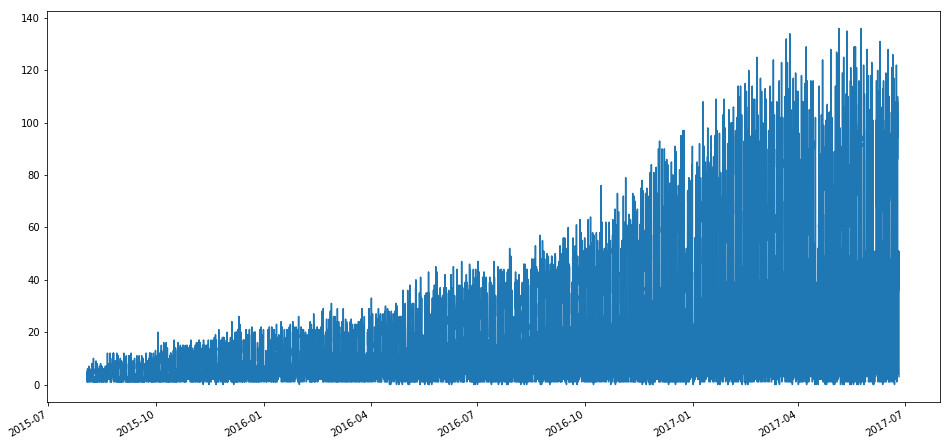

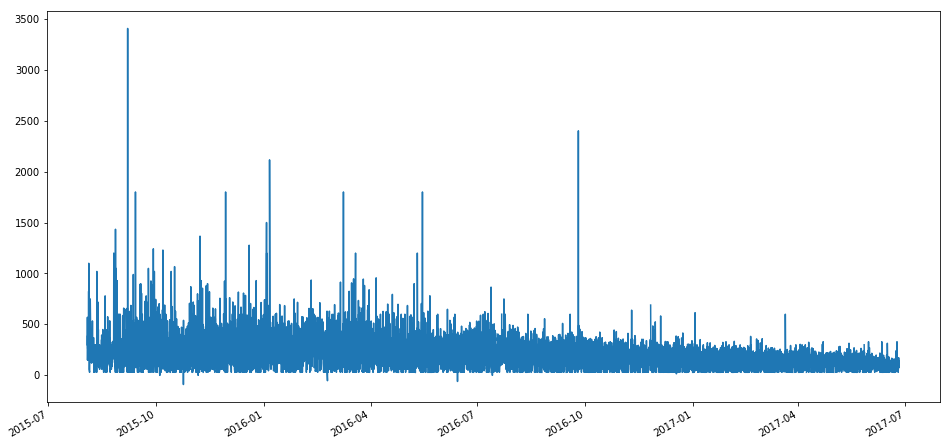

In [10]:
# Hourly stats
printmd('**Hourly Stats**')
Hourly = Sales
HourlyShopStats = Hourly.describe().transpose()
HourlyStats = Sales.transpose().describe().transpose()
 

# Number of POS 
HourlyStats['count'].plot(figsize=(16, 8))
plt.show()

# Mean Sales
HourlyStats['mean'].plot(figsize=(16, 8))
plt.show()

**Hourly Performance**

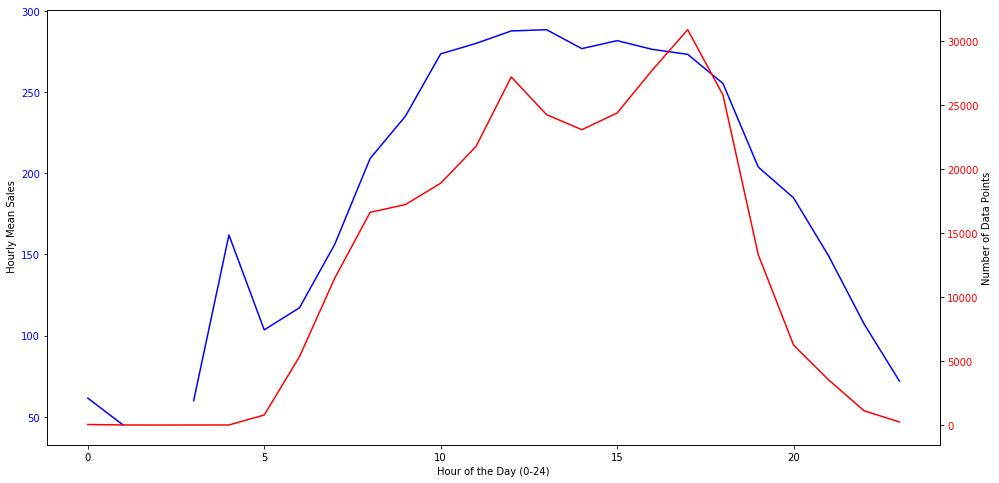

In [11]:
#Checking number of collected data hourly versus Hourly mean sales

HourofDay = HourlyStats.groupby([HourlyStats.index.hour,])['mean'].mean()
printmd('**Hourly Performance**')
# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax,HourofDay.index, HourofDay, HourlyStats.groupby([HourlyStats.index.hour,])['count'].sum(), 
                      'b', 'r','Hour of the Day (0-24)',' Hourly Mean Sales','Number of Data Points' )

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

**Hourly Shopping Stats**

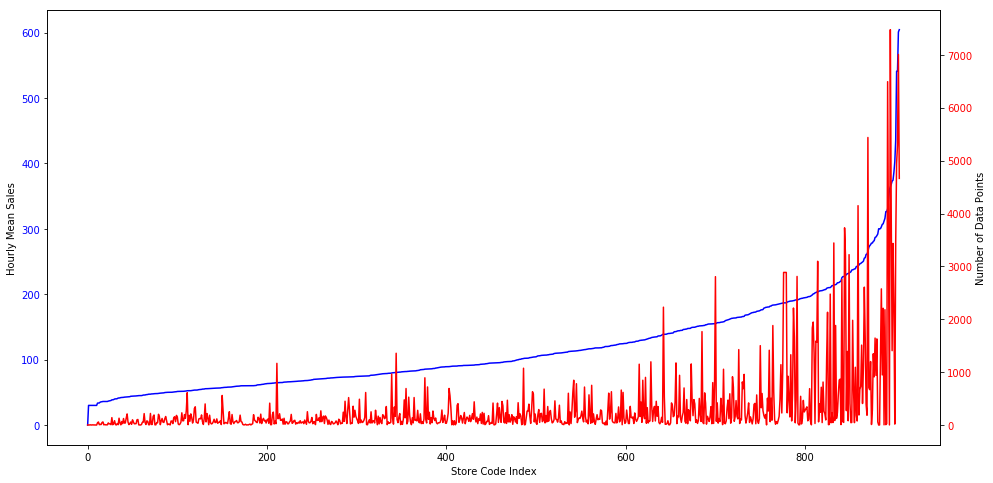

**Hourly Shopping Stats 2016**

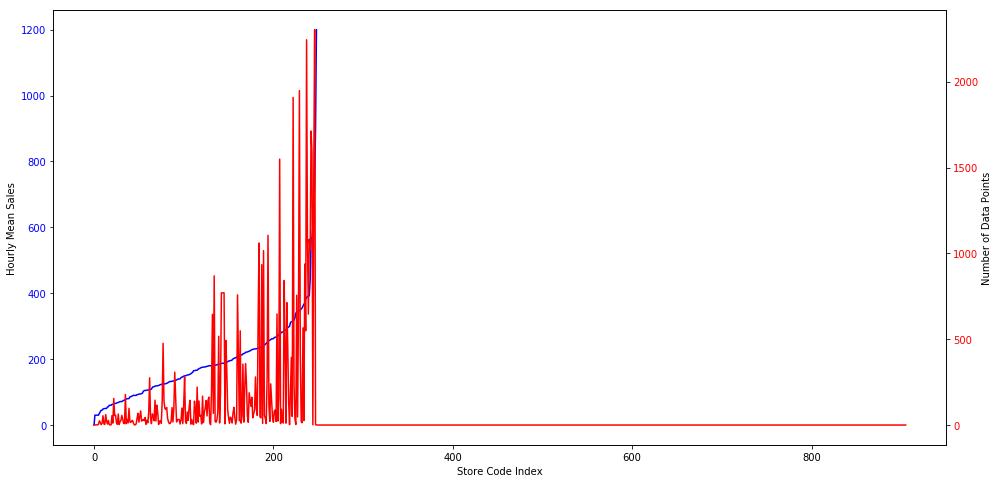

**Hourly Shopping Stats 2017**

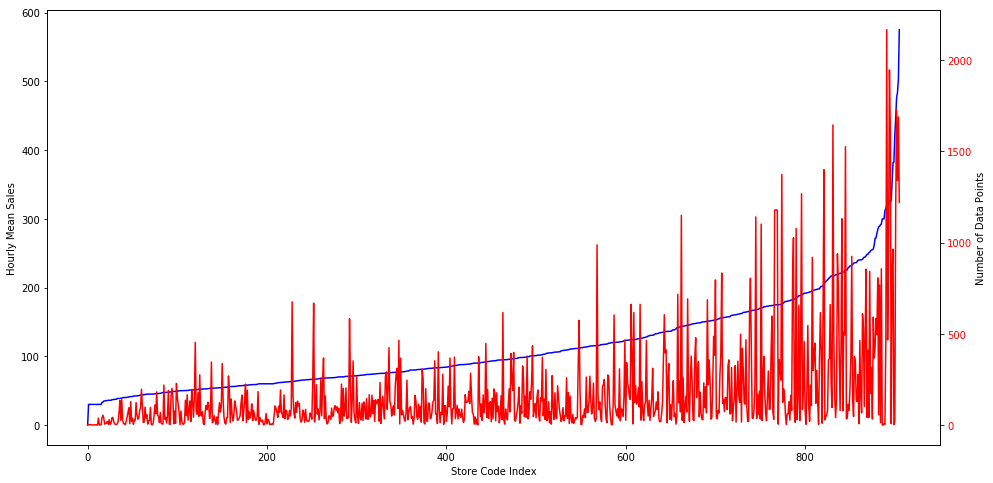

In [12]:
# Create Stats
printmd('**Hourly Shopping Stats**')
Hourly = Sales
HourlyShopStats = Hourly.describe().transpose()
HourlyShopStats.sort_values(['mean'],inplace=True)

# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax, range(0,HourlyShopStats.shape[0]), HourlyShopStats['mean'], 
                      HourlyShopStats['count'], 'b', 'r','Store Code Index',
                      'Hourly Mean Sales','Number of Data Points')

# Change color of  axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

# Controlling same period for 2016 vs 2017
printmd('**Hourly Shopping Stats 2016**')
HourlyShopStats2016=Hourly['2016-01-01':'2016-08-01'].describe().transpose()
HourlyShopStats2016.sort_values(['mean'],inplace=True)
# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax, range(0,HourlyShopStats2016.shape[0]), HourlyShopStats2016['mean'], 
                      HourlyShopStats2016['count'], 'b', 'r','Store Code Index',
                      'Hourly Mean Sales','Number of Data Points')

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

printmd('**Hourly Shopping Stats 2017**')
HourlyShopStats2017=Hourly['2017-01-01':'2017-08-01'].describe().transpose()
HourlyShopStats2017.sort_values(['mean'],inplace=True)
# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
ax1, Ax2 = diff_scale(Ax, range(0,HourlyShopStats2017.shape[0]), HourlyShopStats2017['mean'],
                      HourlyShopStats2017['count'], 'b', 'r','Store Code Index',
                      'Hourly Mean Sales','Number of Data Points')

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

In [13]:
SalesDaily = Sales.resample('D').mean()
printmd('**Dimension:{0}**  **Density:{1}**'.format(SalesDaily.shape,SalesDaily.to_sparse().density))
SalesDaily.head()

**Dimension:(693, 906)**  **Density:0.18002159724014027**

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,228.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN


**Daily Stats**

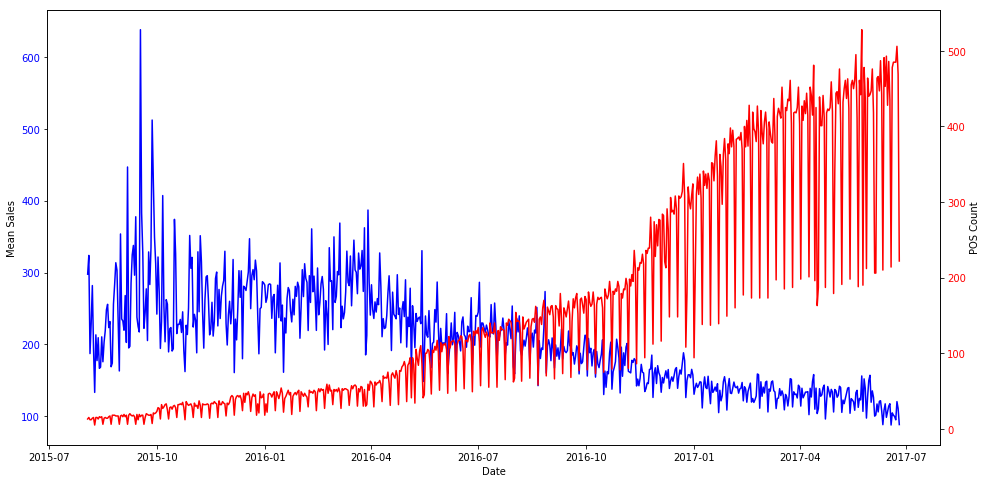

In [14]:
# Create stats
printmd('**Daily Stats**')
DailyShopStats = Hourly.describe(exclude=['O']).transpose()
 
DailyStats = SalesDaily.transpose().describe().transpose()

# Create plot 
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax, DailyStats.index, DailyStats['mean'], DailyStats['count'], 
                      'b', 'r','Date','Mean Sales','POS Count' )
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

**Day of Month Performance**

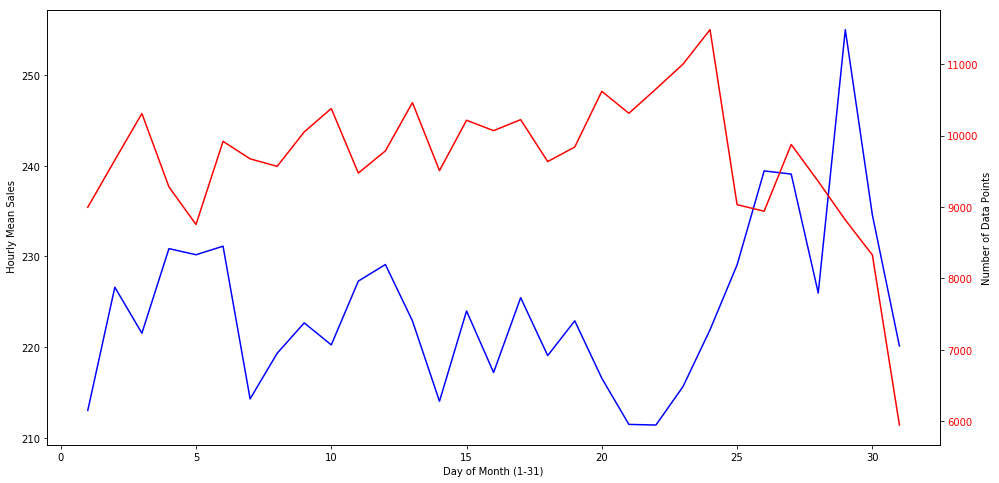

In [15]:
DayofMonth = HourlyStats.groupby([Hourly.index.day,])['mean'].mean()
printmd('**Day of Month Performance**')
# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax,DayofMonth.index, DayofMonth, HourlyStats.groupby([HourlyStats.index.day,])['count'].sum(), 
                      'b', 'r','Day of Month (1-31)',' Hourly Mean Sales','Number of Data Points' )

# Change color of each axis
coloring(ax1, 'b')
coloring(Ax2, 'r')
plt.show()

In [16]:
SalesWeekly = Sales.resample('W').mean()
SalesWeekly.head()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,215.000000,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,175.000000,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,194.117647,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,278.918919,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,177.804878,NaN,NaN,NaN,NaN,NaN,NaN


**Weekly Stats**

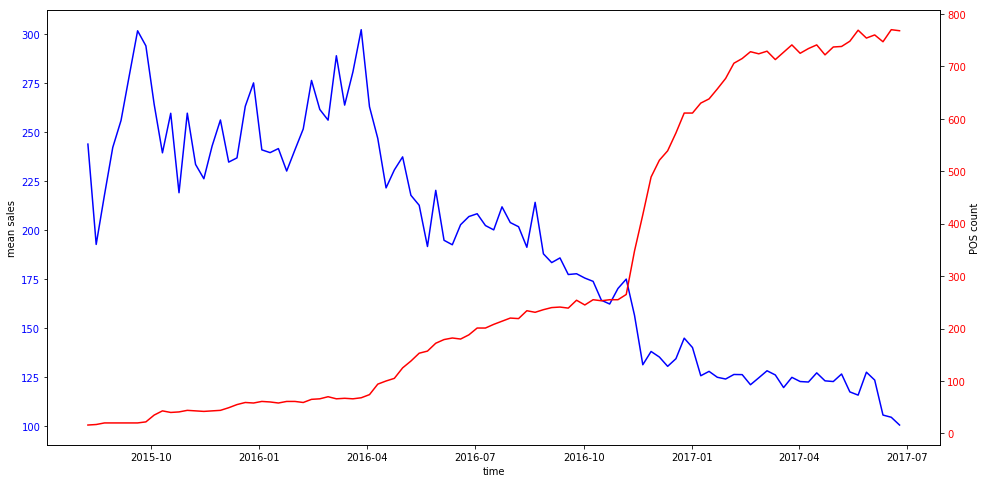

In [18]:
# create stats
printmd('**Weekly Stats**')
WeeklyShopStats = SalesWeekly.describe().transpose()
WeeklyStats = SalesWeekly.transpose().describe().transpose()

# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax, WeeklyStats.index, WeeklyStats['mean'], 
                      WeeklyStats['count'], 'b', 'r','time','mean sales','POS count' )

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

In [19]:
SalesMonthly = Sales.resample('M').mean()

SalesMonthly.head()

store_code,10055,10077,10079,10081,10085,10086,10111,10176,10377,10384,...,84089,84125,84128,84146,84219,84223,84351,84608,84658,85011
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,217.241379,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,295.977654,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.615385,...,NaN,NaN,NaN,260.546218,NaN,NaN,NaN,158.064516,NaN,NaN
2015-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182.307692,...,NaN,NaN,NaN,288.734694,NaN,NaN,NaN,163.378378,NaN,NaN
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184.500000,...,NaN,NaN,NaN,351.752988,NaN,NaN,NaN,168.913043,NaN,NaN


**Monthly Shop Stats**

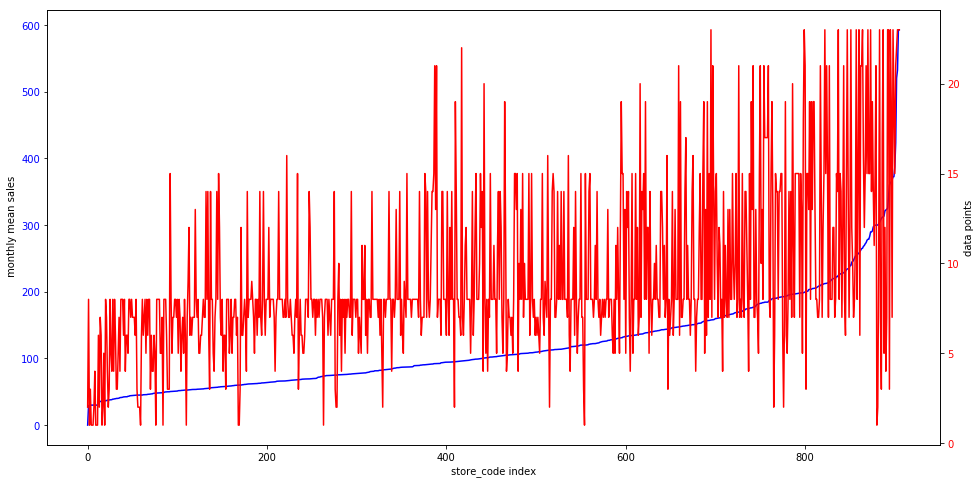

**Monthly Shop Stats 2016**

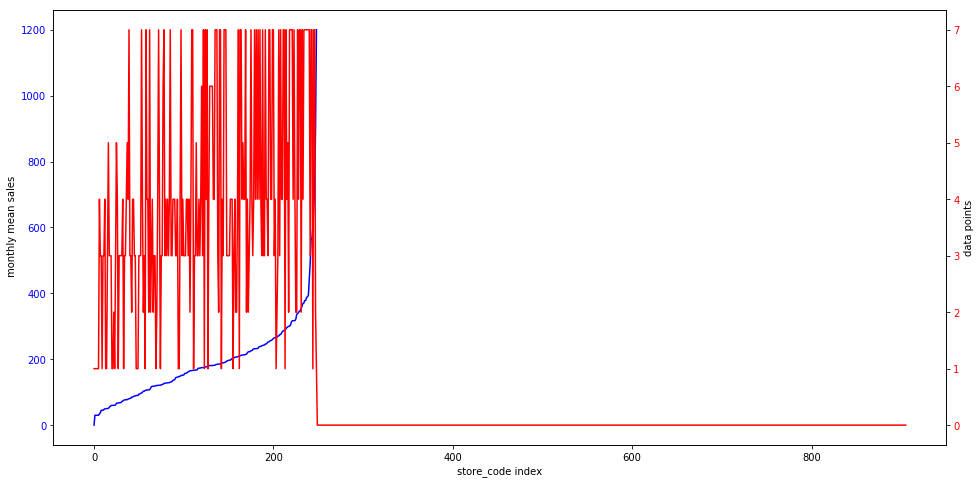

**Monthly Shop Stats 2017**

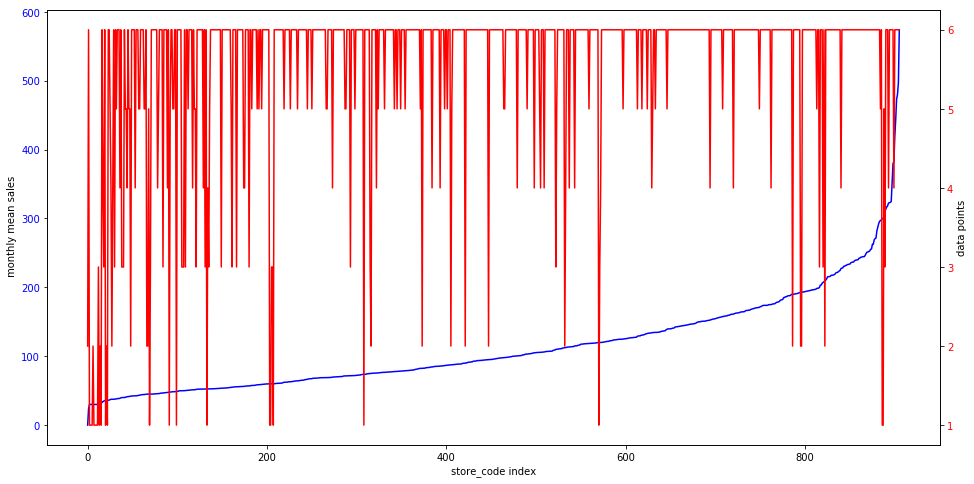

In [20]:
# create stats
printmd('**Monthly Shop Stats**')
MonthlyShopStats = SalesMonthly.describe().transpose()
MonthlyShopStats.sort_values(['mean'],inplace=True)

# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax, range(0,MonthlyShopStats.shape[0]), 
                      MonthlyShopStats['mean'], MonthlyShopStats['count'], 
                      'b', 'r','store_code index',' monthly mean sales','data points' )

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

printmd('**Monthly Shop Stats 2016**')
MonthlyShopStats2016=SalesMonthly['2016-01-01':'2016-08-01'].describe().transpose()
MonthlyShopStats2016.sort_values(['mean'],inplace=True)
# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax, range(0,MonthlyShopStats2016.shape[0]), MonthlyShopStats2016['mean'], 
                      MonthlyShopStats2016['count'], 'b', 'r','store_code index',' monthly mean sales','data points' )

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

printmd('**Monthly Shop Stats 2017**')
MonthlyShopStats2017=SalesMonthly['2017-01-01':'2017-08-01'].describe().transpose()
MonthlyShopStats2017.sort_values(['mean'],inplace=True)
# Create axes
fig, Ax = plt.subplots(figsize=(16, 8))
Ax1, Ax2 = diff_scale(Ax, range(0,MonthlyShopStats2017.shape[0]), MonthlyShopStats2017['mean'], 
                      MonthlyShopStats2017['count'], 'b', 'r','store_code index',' monthly mean sales','data points' )

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

**Monthly Stats**

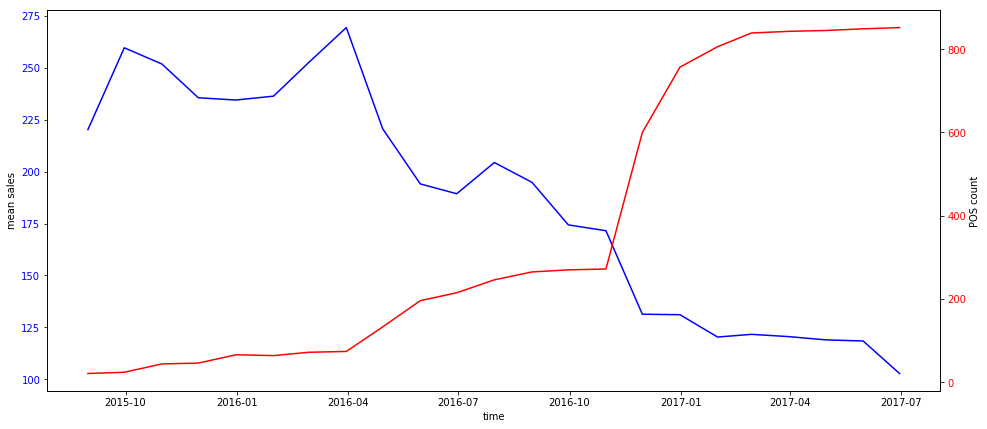

In [21]:
# create stats
printmd('**Monthly Stats**')
MonthlyShopStats = SalesMonthly.describe().transpose()
MonthlyStats = SalesMonthly.transpose().describe().transpose()

# Create axes
fig, Ax = plt.subplots(figsize=(16, 7))
Ax1, Ax2 = diff_scale(Ax, MonthlyStats.index, MonthlyStats['mean'], 
                      MonthlyStats['count'], 'b', 'r','time','mean sales','POS count' )

# Change color of each axis
coloring(Ax1, 'b')
coloring(Ax2, 'r')
plt.show()

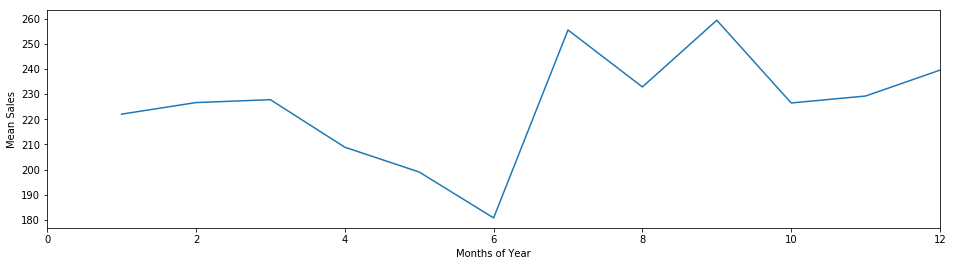

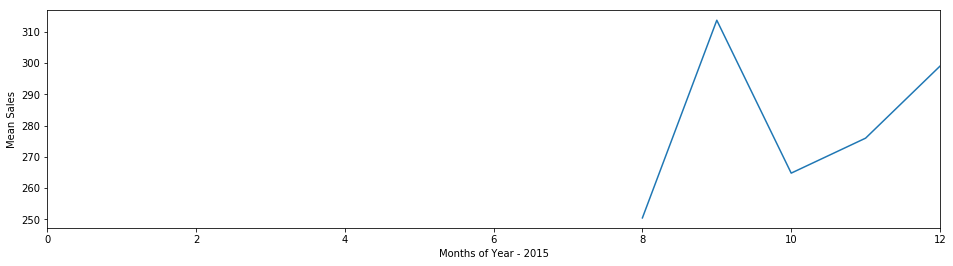

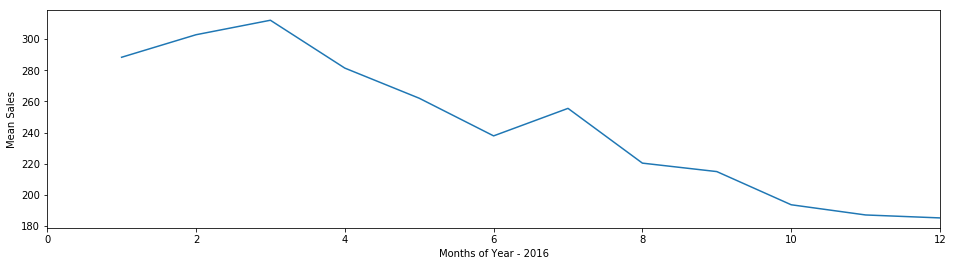

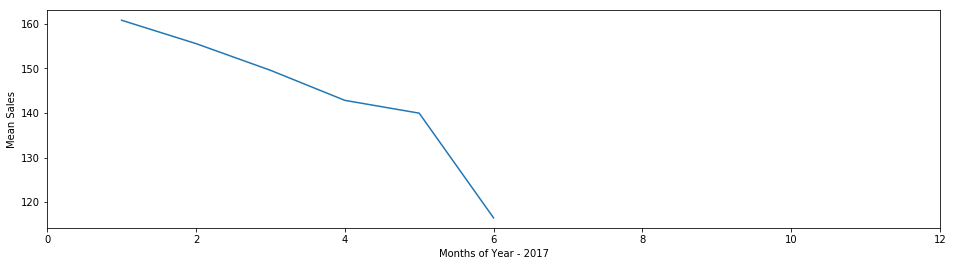

In [22]:
MonthofYear = HourlyStats.groupby([HourlyStats.index.month,])['mean'].mean()
MonthofYear.plot(figsize=(16, 4))
plt.ylabel('Mean Sales')
plt.xlabel('Months of Year')
plt.xlim([0,12])
plt.show()
MonthofYear = HourlyStats['2015-01-01':'2015-12-31'].groupby([HourlyStats['2015-01-01':'2015-12-31'].index.month,])['mean'].mean()
MonthofYear.plot(figsize=(16, 4))
plt.ylabel('Mean Sales')
plt.xlabel('Months of Year - 2015')
plt.xlim([0,12])
plt.show()
MonthofYear = HourlyStats['2016-01-01':'2016-12-31'].groupby([HourlyStats['2016-01-01':'2016-12-31'].index.month,])['mean'].mean()
MonthofYear.plot(figsize=(16, 4))
plt.ylabel('Mean Sales')
plt.xlabel('Months of Year - 2016')
plt.xlim([0,12])
plt.show()
MonthofYear = HourlyStats['2017-01-01':'2017-12-31'].groupby([HourlyStats['2017-01-01':'2017-12-31'].index.month,])['mean'].mean()
MonthofYear.plot(figsize=(16, 4))
plt.ylabel('Mean Sales')
plt.xlabel('Months of Year - 2017')
plt.xlim([0,12])
plt.show()

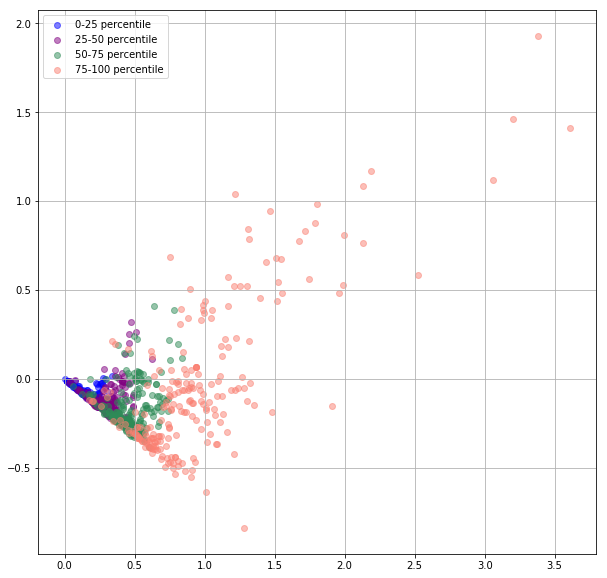

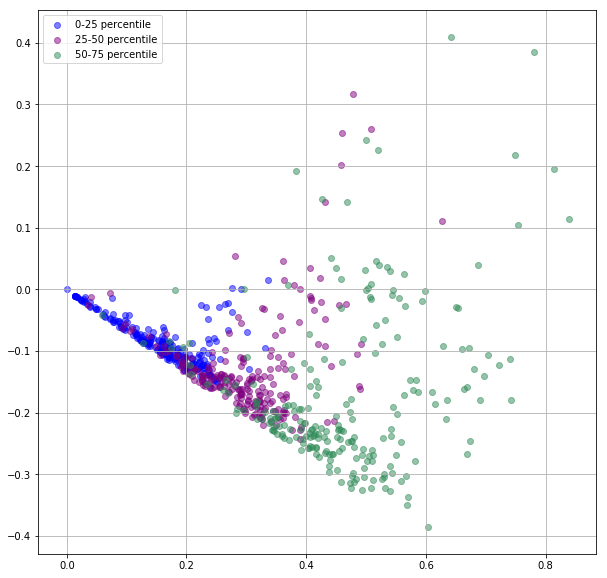

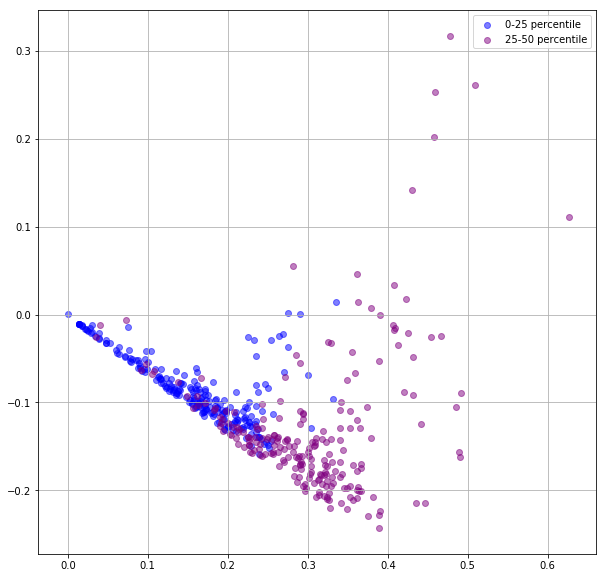

In [23]:
from scipy.sparse import csr_matrix
# Classifying the data set
Data = SalesMonthly.transpose()
Data['mean sales'] = MonthlyShopStats['mean']
X = SalesMonthly.transpose()
X = sparse.csr_matrix(X.fillna(0))

#Scaling MaxAbs
XScaled = preprocessing.maxabs_scale(X)
Data['mean sales label']=pd.qcut(Data['mean sales'],4, labels=['0-25 percentile','25-50 percentile','50-75 percentile','75-100 percentile'])
Y = Data['mean sales label'].values

#Encoder
LE = LabelEncoder()
LabelEncoding = LE.fit(Y)
Y = LabelEncoding.transform(Y) + 1
label = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}

#Singular Value Decomposition
SVD = TruncatedSVD(n_components=2, n_iter=10, random_state=35)
SVD.fit(XScaled)
X=SVD.fit_transform(XScaled)

Fig1,Ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'purple', 'seagreen','salmon')):
        Ax.scatter(X[Y==lab, 0], X[Y==lab, 1], c=col,alpha=0.5,label='{}'.format(label[lab]))
Ax.legend()
Ax.grid(True)
plt.show()

Fig2,Ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,4), ('blue', 'purple', 'seagreen')):
        Ax.scatter(X[Y==lab, 0], X[Y==lab, 1], c=col,alpha=0.5,label='{}'.format(label[lab]))
Ax.legend()
Ax.grid(True)
plt.show()

Fig3,Ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,3), ('blue', 'purple')):
        Ax.scatter(X[Y==lab, 0], X[Y==lab, 1], c=col,alpha=0.5,label='{}'.format(label[lab]))
Ax.grid(True)
Ax.legend()
plt.show()

#fig = tls.mpl_to_plotly(fig1)
#fig['layout'].update(showlegend=True)
#py.iplot(fig)

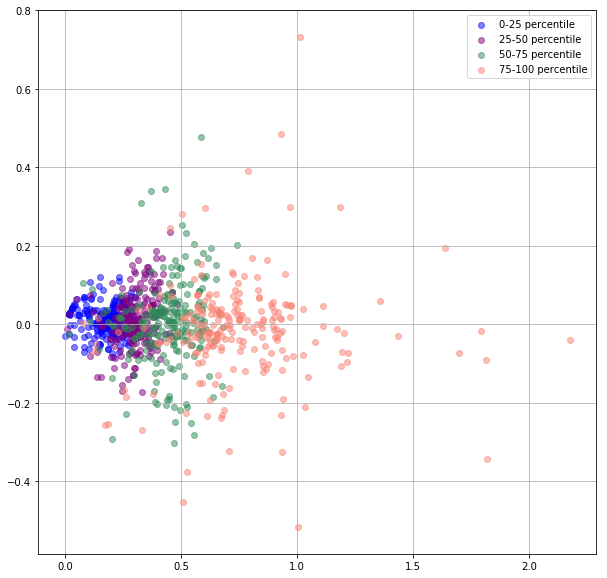

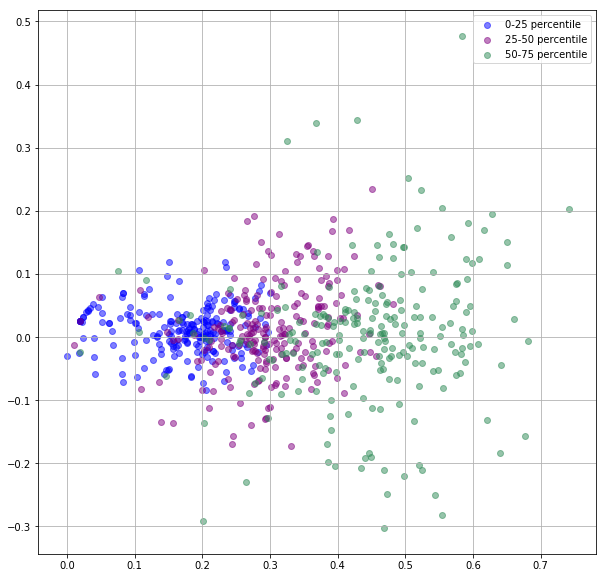

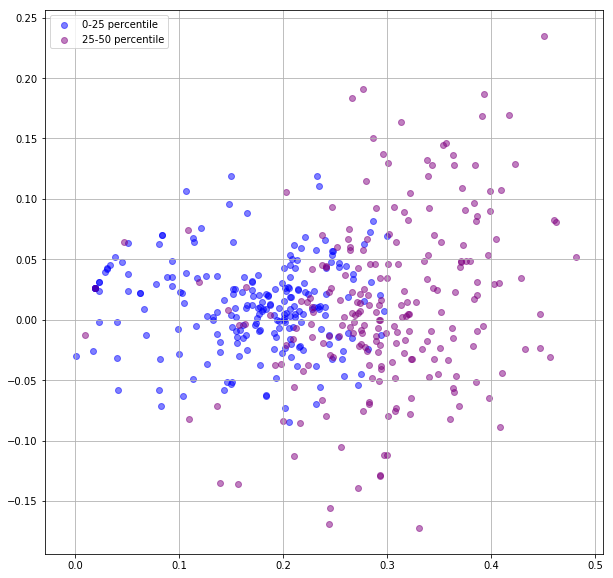

In [25]:
Data = SalesMonthly['2017-01-01':'2017-08-01'].transpose()
Data['mean sales'] = MonthlyShopStats['mean']
X = SalesMonthly['2017-01-01':'2017-08-01'].transpose()
X = sparse.csr_matrix(X.fillna(0))
XScaled = preprocessing.maxabs_scale(X)
Data['mean sales label']=pd.qcut(Data['mean sales'],4, labels=['0-25 percentile','25-50 percentile','50-75 percentile','75-100 percentile'])
y = Data['mean sales label'].values

Encoding = LabelEncoder()
LE = Encoding.fit(y)
y = LE.transform(y) + 1
Label = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}

SVD = TruncatedSVD(n_components=2, n_iter=10, random_state=35)
SVD.fit(XScaled)
X=SVD.fit_transform(XScaled)

Fig1,Ax = plt.subplots(figsize=(10, 10))
for Lab,Col in zip(range(1,5), ('blue', 'purple', 'seagreen','salmon')):
        Ax.scatter(X[Y==Lab, 0], X[Y==Lab, 1], c=Col,alpha=0.5,label='{}'.format(label[Lab]))
Ax.legend()
Ax.grid(True)
plt.show()

Fig2,Ax = plt.subplots(figsize=(10, 10))
for Lab,Col in zip(range(1,4), ('blue', 'purple', 'seagreen')):
        Ax.scatter(X[Y==Lab, 0], X[Y==Lab, 1], c=Col,alpha=0.5,label='{}'.format(label[Lab]))
Ax.legend()
Ax.grid(True)
plt.show()

Fig3,Ax = plt.subplots(figsize=(10, 10))
for Lab,Col in zip(range(1,3), ('blue', 'purple')):
        Ax.scatter(X[Y==Lab, 0], X[Y==Lab, 1], c=Col,alpha=0.5,label='{}'.format(label[Lab]))
Ax.grid(True)
Ax.legend()
plt.show()

In [26]:
#target variable
Data = SalesMonthly['2017-01-01':'2017-08-01'].transpose()
Data['mean sales'] = MonthlyShopStats['mean']
Data['mean sales label']=pd.qcut(Data['mean sales'],4, 
                                 labels=['0-25 percentile','25-50 percentile','50-75 percentile','75-100 percentile'])
TargetVariable=Data[['mean sales','mean sales label']]

In [27]:
TargetVariable.describe()

,mean sales
count,906.000000
mean,120.082583
std,73.052583
min,0.000000
25%,67.161011
50%,102.389759
75%,151.392170
max,592.819624


In [28]:
# Load Surroundings

with open(SurroundingsPath, 'r') as f:Surroundings = json.loads(f.read())
    
Surroundings = json_normalize(Surroundings)

In [29]:
Surroundings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 90 columns):
store_code                              546 non-null int64
surroundings.accounting                 546 non-null object
surroundings.airport                    546 non-null object
surroundings.amusement_park             546 non-null object
surroundings.aquarium                   546 non-null object
surroundings.art_gallery                546 non-null object
surroundings.atm                        546 non-null object
surroundings.bakery                     546 non-null object
surroundings.bank                       546 non-null object
surroundings.bar                        546 non-null object
surroundings.beauty_salon               546 non-null object
surroundings.bicycle_store              546 non-null object
surroundings.book_store                 546 non-null object
surroundings.bowling_alley              546 non-null object
surroundings.bus_station                546 non-null obj

In [30]:
#Checking structure of surrounding file
print(Surroundings.iloc[0]['surroundings.beauty_salon'])

[{'website': 'http://www.jadebeaute.com/', 'rating': 4, 'place_id': 'ChIJQX0xf_1vjEcRb3nniibfdv0', 'name': 'Jade Beaute, Nguyen', 'opening_hours': {'weekday_text': ['Monday: 9:00 AM – 6:00 PM', 'Tuesday: 9:00 AM – 6:00 PM', 'Wednesday: 9:00 AM – 6:00 PM', 'Thursday: 9:00 AM – 6:00 PM', 'Friday: 9:00 AM – 6:00 PM', 'Saturday: 9:00 AM – 6:00 PM', 'Sunday: Closed'], 'open_now': True, 'periods': [{'close': {'day': 1, 'time': '1800'}, 'open': {'day': 1, 'time': '0900'}}, {'close': {'day': 2, 'time': '1800'}, 'open': {'day': 2, 'time': '0900'}}, {'close': {'day': 3, 'time': '1800'}, 'open': {'day': 3, 'time': '0900'}}, {'close': {'day': 4, 'time': '1800'}, 'open': {'day': 4, 'time': '0900'}}, {'close': {'day': 5, 'time': '1800'}, 'open': {'day': 5, 'time': '0900'}}, {'close': {'day': 6, 'time': '1800'}, 'open': {'day': 6, 'time': '0900'}}]}, 'user_ratings_total': 1, 'international_phone_number': '+41 22 788 79 69', 'longitude': 6.192416199999999, 'reviews': [{'rating': 4, 'author_name': 'Ela

In [31]:
# Checking Variance of the Entities
def Leng(entities):
    if type(entities) == list:
        if len(entities) == 0:
            return np.nan
        else:
            return len(entities)
    else:
        return entities
Surr=Surroundings
Surr=Surroundings.applymap(Leng)

In [32]:
# attribute variance
print(Surr.var(skipna=True).sort_values())

surroundings.casino                     0.000000e+00
surroundings.airport                    0.000000e+00
surroundings.synagogue                  0.000000e+00
surroundings.roofing_contractor         0.000000e+00
surroundings.bowling_alley              0.000000e+00
surroundings.movie_rental               0.000000e+00
surroundings.convenience_store          0.000000e+00
surroundings.cemetery                   0.000000e+00
surroundings.hardware_store             1.923077e-02
surroundings.train_station              3.553028e-02
surroundings.fire_station               6.236559e-02
surroundings.mosque                     1.141304e-01
surroundings.plumber                    1.322115e-01
surroundings.taxi_stand                 1.379310e-01
surroundings.pet_store                  1.394958e-01
surroundings.courthouse                 1.436782e-01
surroundings.meal_delivery              1.646386e-01
surroundings.car_wash                   2.050420e-01
surroundings.funeral_home               2.1428

In [33]:
# removing features with zero variance and NaN also Store Code

features = Surr.columns.values.tolist()
features.remove('store_code')
features.remove('surroundings.casino')
features.remove('surroundings.airport')
features.remove('surroundings.synagogue')
features.remove('surroundings.roofing_contractor')
features.remove('surroundings.bowling_alley')
features.remove('surroundings.movie_rental')
features.remove('surroundings.convenience_store')
features.remove('surroundings.cemetery')
features.remove('surroundings.aquarium')
features.remove('surroundings.hindu_temple')
features.remove('surroundings.rv_park')

FeatureMeaning = {i:'{}'.format(label.split('.')[1]) for i,label in zip(range(len(features)),features)}
FeatureMeaning

{0: 'accounting',
 1: 'amusement_park',
 2: 'art_gallery',
 3: 'atm',
 4: 'bakery',
 5: 'bank',
 6: 'bar',
 7: 'beauty_salon',
 8: 'bicycle_store',
 9: 'book_store',
 10: 'bus_station',
 11: 'cafe',
 12: 'campground',
 13: 'car_dealer',
 14: 'car_rental',
 15: 'car_repair',
 16: 'car_wash',
 17: 'church',
 18: 'city_hall',
 19: 'clothing_store',
 20: 'courthouse',
 21: 'dentist',
 22: 'department_store',
 23: 'doctor',
 24: 'electrician',
 25: 'electronics_store',
 26: 'embassy',
 27: 'fire_station',
 28: 'florist',
 29: 'funeral_home',
 30: 'furniture_store',
 31: 'gas_station',
 32: 'gym',
 33: 'hair_care',
 34: 'hardware_store',
 35: 'home_goods_store',
 36: 'hospital',
 37: 'insurance_agency',
 38: 'jewelry_store',
 39: 'laundry',
 40: 'lawyer',
 41: 'library',
 42: 'liquor_store',
 43: 'local_government_office',
 44: 'locksmith',
 45: 'lodging',
 46: 'meal_delivery',
 47: 'meal_takeaway',
 48: 'mosque',
 49: 'movie_theater',
 50: 'moving_company',
 51: 'museum',
 52: 'night_club',

In [34]:
# Adding Target Variable
TargetVariable['store_code']=TargetVariable.index
Surr=pd.merge(Surr, TargetVariable,how='inner',on=['store_code'])

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



In [35]:
DataCol=features + ['mean sales','mean sales label']
Data = Surr[DataCol]
Data.index=Surr['store_code']
Data.columns = [l for i,l in sorted(FeatureMeaning.items())] + ['mean sales','mean sales label']

In [36]:
X = Data[[l for i,l in sorted(FeatureMeaning.items())]].fillna(0).values
Y = Data['mean sales label'].values
Encoding = LabelEncoder()
LE = Encoding.fit(Y)
Y= LE.transform(Y) + 1
LabelMeaning = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}


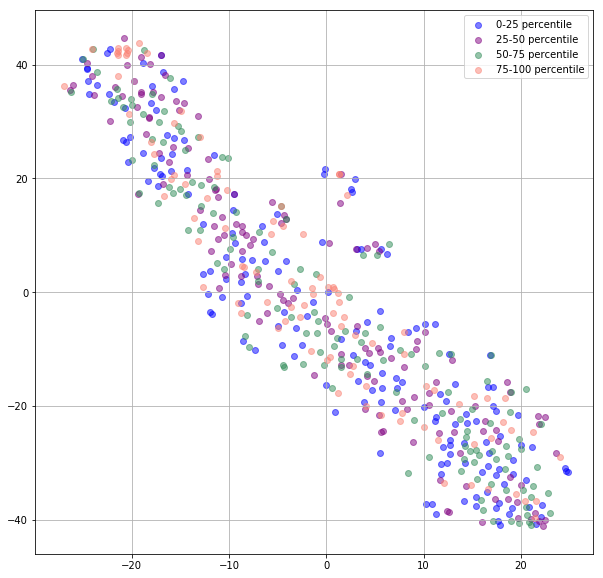

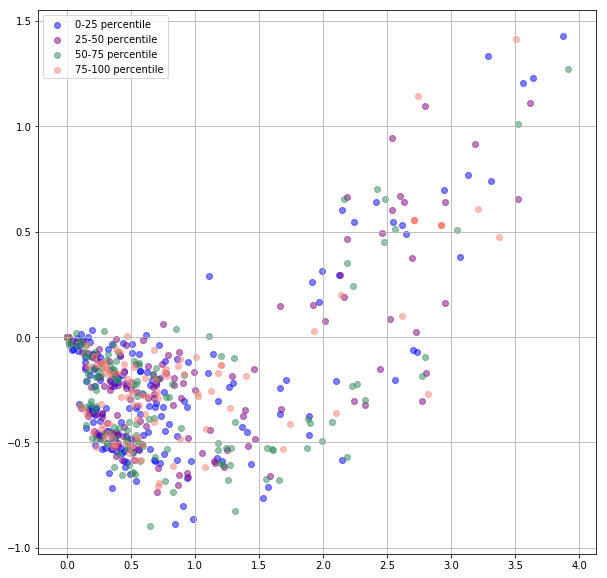

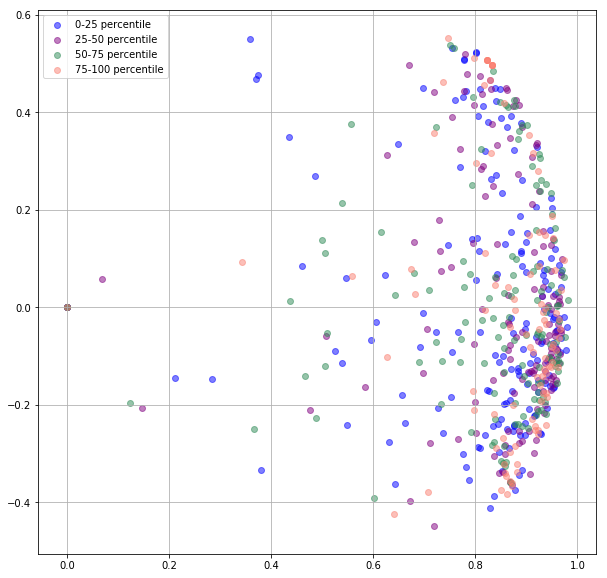

In [37]:
#scatter plots

X = Data[[l for i,l in sorted(FeatureMeaning.items())]].fillna(0).values
XScaled = preprocessing.scale(X)

# TSNE can't handle sparse data
X = TSNE(n_components=2).fit_transform(X)

fig1,Ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'purple', 'seagreen','salmon')):
        Ax.scatter(X[Y==lab, 0], X[Y==lab, 1], c=col,alpha=0.5,label='{}'.format(LabelMeaning[lab]))
Ax.legend()
Ax.grid(True)
plt.show()


# Min Max scaled and sparse
X = Data[[l for i,l in sorted(FeatureMeaning.items())]].fillna(0).values
X = sparse.csr_matrix(X)
XScaled = preprocessing.maxabs_scale(X)

SVD = TruncatedSVD(n_components=2, n_iter=10, random_state=35)
SVD.fit(XScaled)
X=SVD.fit_transform(XScaled)

fig1,Ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'purple', 'seagreen','salmon')):
        Ax.scatter(X[Y==lab, 0], X[Y==lab, 1], c=col,alpha=0.5,label='{}'.format(LabelMeaning[lab]))
Ax.legend()
Ax.grid(True)
plt.show()

#Normalised Data
X = Data[[l for i,l in sorted(FeatureMeaning.items())]].fillna(0).values
XNormalized = preprocessing.normalize(X, norm='l2')
SVD = TruncatedSVD(n_components=2, n_iter=10, random_state=35)
SVD.fit(XNormalized)
X=SVD.fit_transform(XNormalized)

fig1,Ax = plt.subplots(figsize=(10, 10))
for lab,col in zip(range(1,5), ('blue', 'purple', 'seagreen','salmon')):
        Ax.scatter(X[Y==lab, 0], X[Y==lab, 1], c=col,alpha=0.5,label='{}'.format(LabelMeaning[lab]))
Ax.legend()
Ax.grid(True)
plt.show()

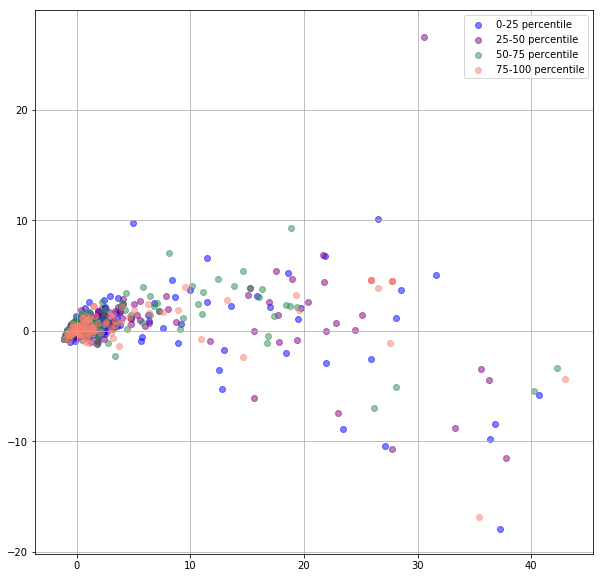

In [38]:
# robust scaling to hadle outliers
X = Data[[l for i,l in sorted(FeatureMeaning.items())]].fillna(0).values
XScaled = preprocessing.robust_scale(X)

SVD = TruncatedSVD(n_components=2,algorithm='arpack' ,n_iter=10, random_state=35)

X=SVD.fit_transform(XScaled)


Fig1,Ax = plt.subplots(figsize=(10, 10))
for Lab,Col in zip(range(1,5), ('blue', 'purple', 'seagreen','salmon')):
        Ax.scatter(X[Y==Lab, 0], X[Y==Lab, 1], c=Col,alpha=0.5,label='{}'.format(label[Lab]))
Ax.legend()
Ax.grid(True)
plt.show()

# STEP 3 – DATA PREPERATION


Most data used for data mining was originally collected and preserved for other purposes and needs some refinement before it is ready to use for modeling.

The data preparation phase includes five tasks. These are

Selecting data

Cleaning data

Constructing data

Integrating data

Formatting data

In [46]:
def Leng(entities):
    if type(entities) == list:
        if len(entities) == 0:
            return np.nan
        else:
            return len(entities)
    else:
        return entities

def DataPrep(RawData=Surroundings,features=None,TargetVar=TargetVariable,type='C',sprse=False):

    Data=RawData.applymap(Leng)
    if not features:
        features = Data.columns.values.tolist()
        features.remove('store_code')
        features.remove('surroundings.casino')
        features.remove('surroundings.airport')
        features.remove('surroundings.synagogue')
        features.remove('surroundings.roofing_contractor')
        features.remove('surroundings.bowling_alley')
        features.remove('surroundings.movie_rental')
        features.remove('surroundings.convenience_store')
        features.remove('surroundings.cemetery')
        features.remove('surroundings.aquarium')
        features.remove('surroundings.hindu_temple')
        features.remove('surroundings.rv_park')

        FeatureMeaning = {i:'{}'.format(label.split('.')[1]) for i,label in zip(range(len(features)),features)}
    else:
        FeatureMeaning =dict(zip(range(len(features)),features))
        features =['surroundings.{}'.format(f) for f in features]
    TargetVar['store_code']=TargetVar.index
    Data=pd.merge(Data, TargetVar,how='inner',on=['store_code'])
    DataCol=features + ['mean sales','mean sales label']
    Data = Data[DataCol]
    Data.index=RawData['store_code']
    Data.columns = [l for i,l in sorted(FeatureMeaning.items())] + ['mean sales','mean sales label']
    X = Data[[l for i,l in sorted(FeatureMeaning.items())]].fillna(0).values
    XScaled = preprocessing.maxabs_scale(X)
    XNormalized = preprocessing.normalize(X, norm='l2')   
    if sprse:
        X = sparse.csr_matrix(X)
        XScaled = preprocessing.maxabs_scale(X)
    if type=='C':
        # continous output
        Y = Data['mean sales'].values
        YScaled = preprocessing.scale(Y)
        return X,XScaled,Y,YScaled,features,FeatureMeaning


    elif type=='D':
        # discrete/categorical output
        Y = Data['mean sales label'].values
        Encoding = LabelEncoder()
        LE = Encoding.fit(Y)
        YLabelled = LE.transform(Y) + 1
        LabelMeaning = {1: '0-25 percentile', 2: '25-50 percentile', 3:'50-75 percentile', 4:'75-100 percentile'}
        return X,XScaled,Y,YLabelled,features,FeatureMeaning,LabelMeaning

X,XScaled,Y,YScaled,features,FeatureMeaning = DataPrep()


/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



# STEP 4 – MODELLING

After data preparation, our data is already in good shape, and now you can search for useful patterns in your data.

The modeling phase includes four tasks. These are

Selecting modeling techniques

Designing test(s)

Building model(s)

Assessing model(s)

In [55]:
X,XScaled,Y,YScaled,features,FeatureMeaning = DataPrep()
PearsonCorr = dict()
for col,feature in FeatureMeaning.items():
    PearsonCorr[feature]=sp.stats.pearsonr(XScaled[:,col],Y)[0]
PearsonCorr=sorted(PearsonCorr.items(), key=operator.itemgetter(1),reverse=True)  
print('\n'.join(['{} correlation : {}'.format(f,v) for (f,v) in PearsonCorr]))

def TopFeaturePearson(n=10):
    X,XScaled,Y,YScaled,features,FeatureMeaning = DataPrep()
    PearsonCorr = dict()
    for col,feature in FeatureMeaning.items():
        PearsonCorr[feature]=sp.stats.pearsonr(XScaled[:,col],Y)[0]
    PearsonCorr=sorted(PearsonCorr.items(), key=operator.itemgetter(1),reverse=True) 
    features = [f for (f,v) in sorted(PearsonCorr)]
    return list(features[:n])

pharmacy correlation : 0.09684797323493442
department_store correlation : 0.09642546515508629
hardware_store correlation : 0.09473380346729807
shopping_mall correlation : 0.08014443469744813
bakery correlation : 0.06900891365948363
store correlation : 0.06506275143018932
subway_station correlation : 0.061731554681083524
car_dealer correlation : 0.06064325197305231
post_office correlation : 0.05522183949332073
laundry correlation : 0.05085597085483366
real_estate_agency correlation : 0.04484343763299024
dentist correlation : 0.04219486517712967
clothing_store correlation : 0.041971551615680086
pet_store correlation : 0.040310006954162175
insurance_agency correlation : 0.038341035204406
fire_station correlation : 0.03783939768376027
car_rental correlation : 0.035329371280295396
atm correlation : 0.033358299929753005
locksmith correlation : 0.03284191954268823
spa correlation : 0.032555777315982234
cafe correlation : 0.02903945989559709
taxi_stand correlation : 0.024968061660803783
car_wa

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



Piotroski F-Score is a number between 0-9 which is used to assess strength of company’s financial position. The Score is used by financial investors in order to find the best value stocks (nine being the best). The Score is named after Stanford Accounting Professor, Joseph Piotroski.

In [56]:
#F Score

FScore,PValue=skl.feature_selection.f_regression(XScaled,YScaled)
FReg=dict(zip(FeatureMeaning.values(), FScore))
print('\n'.join(['{} : {}'.format(F,V) for (F,V) in sorted(FReg.items(), key=operator.itemgetter(1),reverse=True)]))

plumber : 7.8428437318085304
pharmacy : 5.1507761351945325
department_store : 5.105511846846033
hardware_store : 4.926335843646171
shopping_mall : 3.516771627453373
embassy : 3.175318161028996
bakery : 2.603049530460909
store : 2.3126296583942914
subway_station : 2.0809971873193986
car_dealer : 2.0080012146866535
police : 1.8719295057994425
post_office : 1.663975860801759
museum : 1.4763191806416314
hospital : 1.421577405913847
lodging : 1.4126483003040988
laundry : 1.4106117027867733
florist : 1.3503828733543903
electronics_store : 1.1281615575585957
real_estate_agency : 1.0961523307968628
storage : 1.044161634546956
electrician : 0.9856832370608006
dentist : 0.9702686889634972
church : 0.9677116254965028
clothing_store : 0.9600076230230958
liquor_store : 0.9181341960643771
pet_store : 0.8853824383581446
university : 0.876746570719863
insurance_agency : 0.800876345659965
fire_station : 0.780026947483211
gym : 0.7298200553690367
moving_company : 0.72283086833585
movie_theater : 0.71097

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



Feature ranking:
1 feature 10 bus_station 0.03858098183255729
2 feature 31 gas_station 0.03616746032215819
3 feature 23 doctor 0.036139574500942906
4 feature 33 hair_care 0.03595999493408077
5 feature 25 electronics_store 0.03476182764916651
6 feature 5 bank 0.032942535531158404
7 feature 19 clothing_store 0.03270639171981626
8 feature 4 bakery 0.032593116526816325
9 feature 7 beauty_salon 0.032539190049246554
10 feature 35 home_goods_store 0.03252357422270027
11 feature 3 atm 0.032366512277982824
12 feature 21 dentist 0.03161674147138196
13 feature 6 bar 0.03131955545636753
14 feature 24 electrician 0.030389972034104387
15 feature 15 car_repair 0.030377436070154258
16 feature 11 cafe 0.02994910081523743
17 feature 28 florist 0.028291698985443866
18 feature 37 insurance_agency 0.0281263804725709
19 feature 30 furniture_store 0.02700130255330251
20 feature 17 church 0.026687491299124396
21 feature 32 gym 0.026133571628084554
22 feature 40 lawyer 0.02445082431489744
23 feature 0 accounti

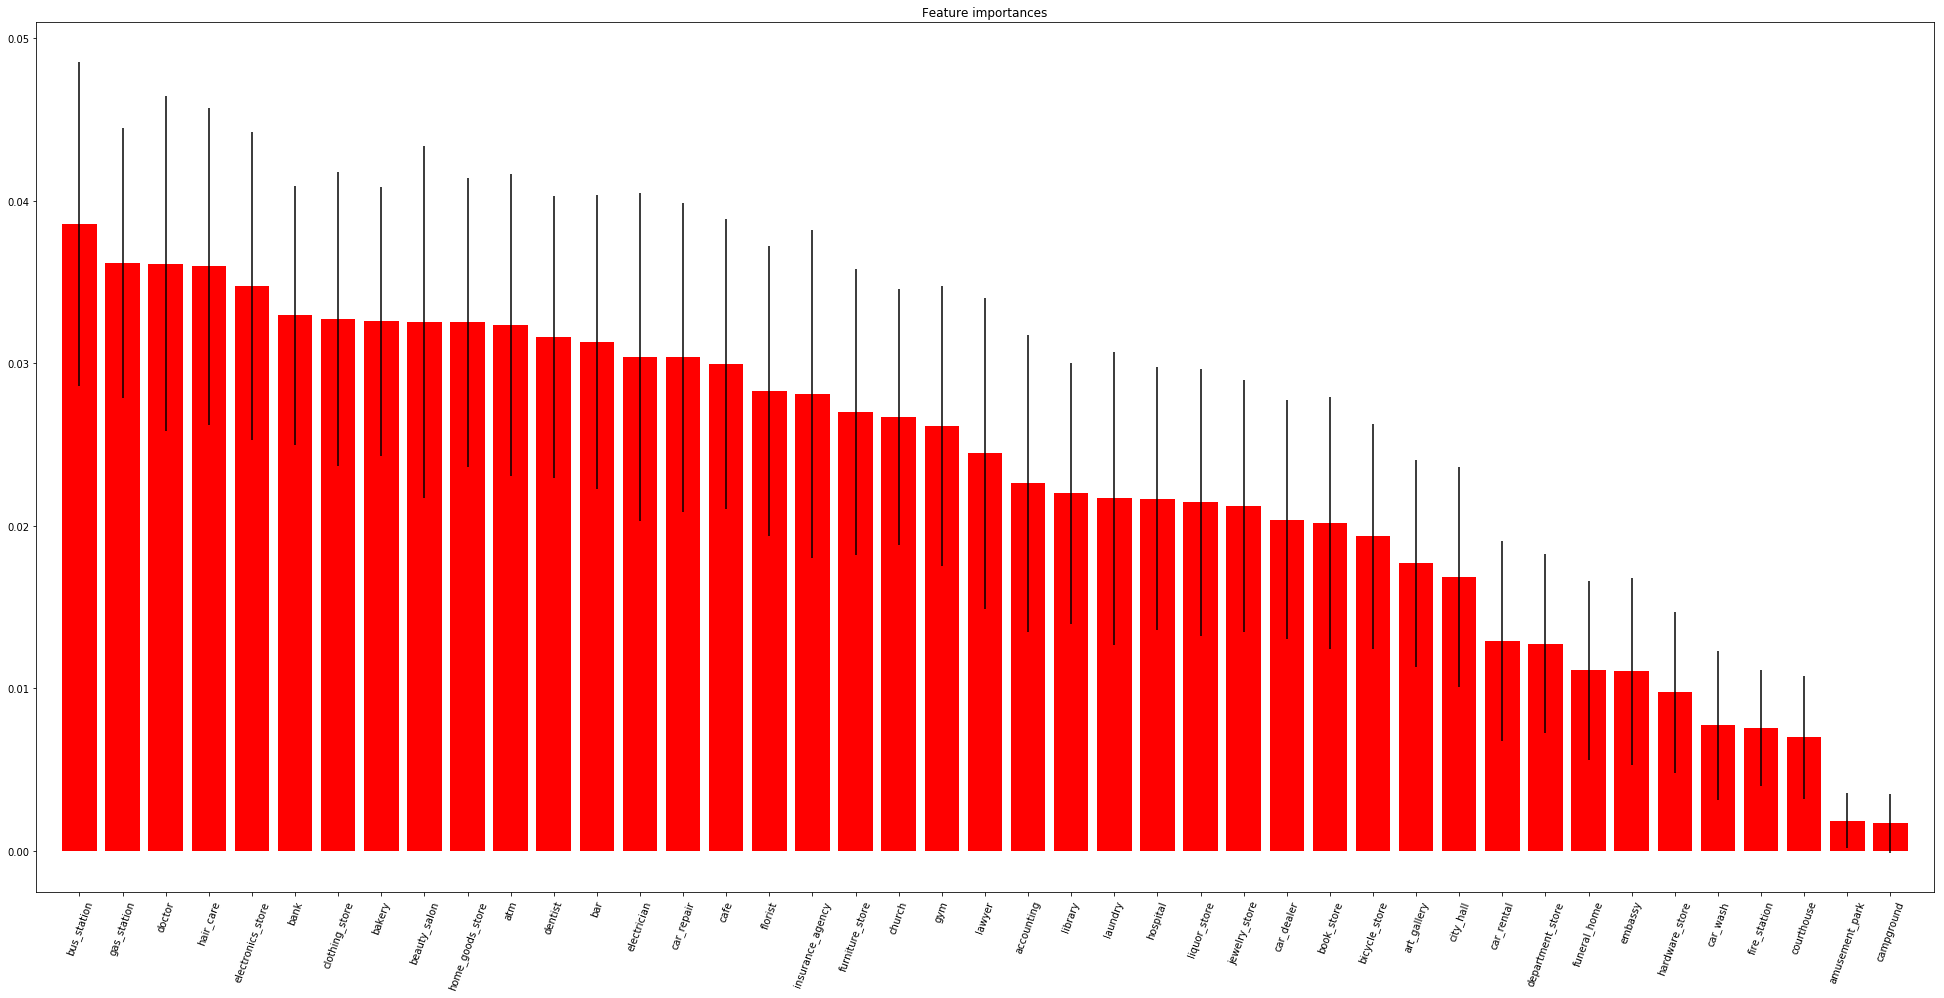

Optimal number of features : 10


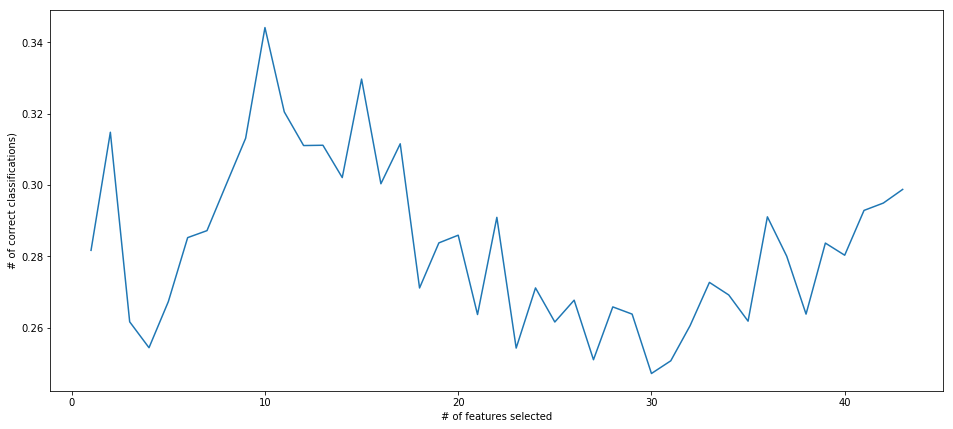

In [57]:
# testing ExtraTreesClassifier
# find best features and optimal feature count
X,XScaled,Y,YLabelled,features,FeatureMeaning,LabelMeaning = DataPrep(features=TopFeaturePearson(43),type='D',sprse=True)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,max_features='sqrt',random_state=25)
forest.fit(X, YLabelled)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
TopCount = X.shape[1]
for f in range(X.shape[1]):
    print('{0} feature {1} {2} {3}'.format(f + 1, indices[f],FeatureMeaning[indices[f]] ,importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(34,16))
plt.title("Feature importances")
plt.bar(range(TopCount), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(TopCount), dict(sorted(FeatureMeaning.items(), key=lambda pair: indices.tolist().index(pair[0]))).values(),rotation=70)  
plt.xlim([-1, TopCount])
plt.show()

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
forest = ExtraTreesClassifier(n_estimators=100,max_features='sqrt',random_state=25)
rfecv = RFECV(forest, step=1, cv=5,scoring='accuracy')
rfecv.fit(X, YLabelled)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16,7))
plt.xlabel("# of features selected")
plt.ylabel("# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

def TopFeatureV2(n=10):
    X,XScaled,Y,YLabelled,features,FeatureMeaning,LabelMeaning = DataPrep(features=TopFeaturePearson(43),type='D',sprse=True)
    forest = ExtraTreesClassifier(n_estimators=100,max_features='sqrt',random_state=25)
    forest.fit(X, YLabelled)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    features = [FeatureMeaning[i] for i in indices]
    return list(features[:n])

In [61]:
X,XScaled,Y,YScaled,features,FeatureMeaning,LabelMeaning = DataPrep(features=TopFeatureV2(35),type='D',sprse=True)
X=SVD.fit_transform(X)
Forest = ExtraTreesClassifier(n_estimators=100,max_features='auto',random_state=35)
Scores = cross_val_score(Forest, X, YScaled, cv=5)
np.mean(Scores)

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



0.23266679593782397

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



Optimal number of features : 1


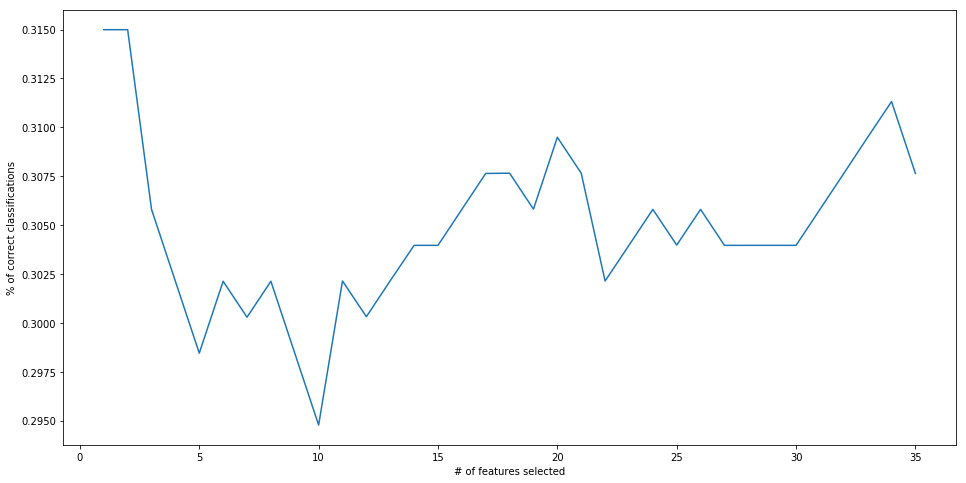

In [64]:
# testing C-Support Vector Classification

X,XScaled,Y,YLabelled,features,FeatureMeaning,LabelMeaning = DataPrep(features=TopFeaturePearson(35),type='D',sprse=True)

Svc = SVC(kernel="linear")
Svc.fit(XScaled, YLabelled)
RFecv = RFECV(estimator=Svc, step=1, cv=StratifiedKFold(2),scoring='accuracy')
RFecv.fit(XScaled, YLabelled)

print("Optimal number of features : %d" % RFecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16,8))
plt.xlabel("# of features selected")
plt.ylabel("% of correct classifications")
plt.plot(range(1, len(RFecv.grid_scores_) + 1), RFecv.grid_scores_)
plt.show()

In [66]:
X,XScaled,Y,YLabelled,features,FeatureMeaning,LabelMeaning = DataPrep(features=TopFeaturePearson(43),type='D',sprse=True)
Svc = SVC(kernel="linear")
Scores = cross_val_score(Svc, XScaled, YLabelled, cv=5,scoring='accuracy',)
np.mean(Scores)

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



0.3095419038409693

In [68]:
# testing RandomForestRegressor
def TopFeatureRF(n=10):
    X,XScaled,Y,YScaled,features,FeatureMeaning = DataPrep(features=TopFeaturePearson(43),sprse=True)
    RF = RandomForestRegressor(n_estimators=100, max_depth=70)
    RF.fit(X,YScaled)
    Indices = np.argsort(RF.feature_importances_)[::-1]
    Features = [FeatureMeaning[i] for i in Indices]
    return list(Features[:n])
X,XScaled,Y,YScaled,Features,FeatureMeaning = DataPrep(features=TopFeatureRF(35)[::-1],sprse=True)
Names = list(FeatureMeaning.values())
Scores = []
RF = RandomForestRegressor(n_estimators=35, max_depth=100)
# add feature to model and check error
for i in range(X.shape[1]):
    Score = cross_val_score(RF, X[:, i:i+1],YScaled, scoring="r2",cv=ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2))    
    Scores.append((round(np.mean(Score), 3), Names[i]))

print('\n'.join(['{} : {}'.format(f,v) for (f,v) in sorted(Scores, reverse=True)]))                             
FeaturesV2 = [f for (v,f) in sorted(Scores, reverse=True)]

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



0.007 : jewelry_store
-0.001 : bicycle_store
-0.005 : florist
-0.005 : book_store
-0.006 : home_goods_store
-0.009 : department_store
-0.01 : lawyer
-0.011 : liquor_store
-0.012 : laundry
-0.012 : church
-0.013 : hospital
-0.013 : gas_station
-0.015 : accounting
-0.016 : car_dealer
-0.017 : furniture_store
-0.019 : car_rental
-0.02 : electronics_store
-0.02 : bakery
-0.021 : city_hall
-0.021 : atm
-0.023 : library
-0.027 : electrician
-0.028 : fire_station
-0.03 : bus_station
-0.03 : bar
-0.034 : gym
-0.034 : car_repair
-0.048 : hair_care
-0.053 : insurance_agency
-0.055 : cafe
-0.06 : bank
-0.072 : dentist
-0.074 : beauty_salon
-0.089 : clothing_store
-0.168 : doctor


/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



Optimal number of features : 26


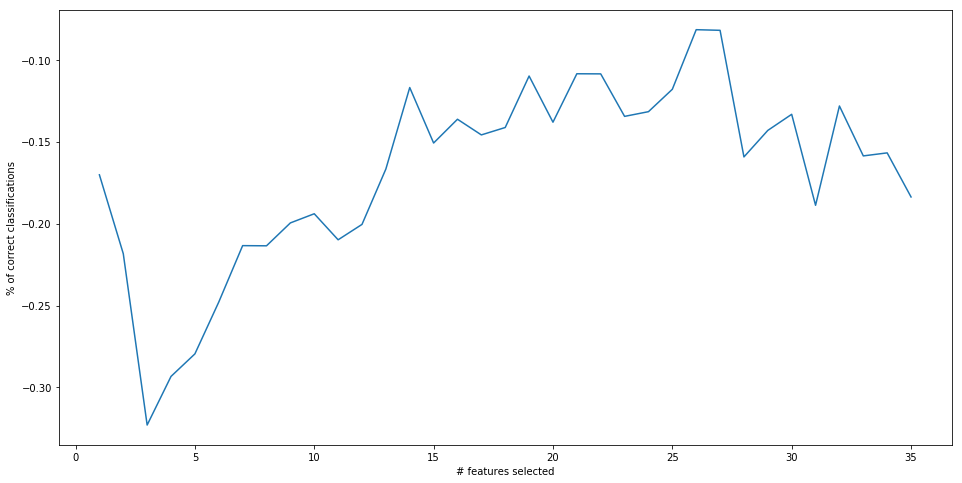

In [71]:
# Create the RFE object and compute a cross-validated score.
X,XScaled,Y,YScaled,features,FeatureMeaning = DataPrep(features=FeaturesV2,sprse=True)
RF = RandomForestRegressor(n_estimators=25, max_depth=100)

# The "r2" scoring is proportional R^2 (coefficient of determination) regression score function
RFecv = RFECV(estimator=RF, step=1, cv=ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2),scoring='r2')
RFecv.fit(X, YScaled)

print("Optimal number of features : %d" % RFecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(16,8))
plt.xlabel("# features selected")
plt.ylabel("% of correct classifications")
plt.plot(range(1, len(RFecv.grid_scores_) + 1), RFecv.grid_scores_)
plt.show()

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)

In [77]:
X,XScaled,Y,YScaled,features,FeatureMeaning = DataPrep(features=FeaturesV2[:35])

RF = RandomForestRegressor(n_estimators=100, max_depth=70)
Scores = cross_val_score(RF, X_train, Y_train, cv=ShuffleSplit(n_splits=5, train_size=0.8, test_size=.2),scoring='r2')
print(Scores)
np.mean(Scores)

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



[ 0.00608545 -0.05026464 -0.07280636 -0.0504608  -0.17512516]


-0.06851429969325555

# STEP 5 – EVALUATION

You’ll evaluate not just the models you create but also the process that you used to create them, and their potential for practical use.

The evaluation phase includes three tasks. These are;

Evaluating results

Reviewing the process

Determining the next steps

In [ ]:
!pip install treeinterpreter

In [78]:
X,XScaled,Y,YScaled,features,FeatureMeaning = DataPrep(features=FeaturesV2[:41])
RF = RandomForestRegressor(n_estimators=25, max_depth=70)
X_train, X_test, Y_train, Y_test = train_test_split(X, YScaled, test_size=0.2, random_state=43)
RF.fit(X_train,Y_train)

/Users/mustafaozturk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

'store_code' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
Prediction1, Bias1, Contributions1 = ti.predict(RF, X_train, joint_contribution=True)
Prediction2, Bias2, Contributions2 = ti.predict(RF, X_test, joint_contribution=True)

Since biases are equal for both datasets (because the the model is the same),
the difference between the average predicted values has to come only from (joint) feature contributions.
In other words, the sum of the feature contribution differences should be equal to the difference in 
average prediction.
We can make use of the aggregated_contributions convenience method which takes the contributions for 
individual predictions and aggregates them together for the whole dataset

In [83]:

AggCont1 = utils.aggregated_contribution(Contributions1)
AggCont2 = utils.aggregated_contribution(Contributions2)
 
print (np.sum(list(AggCont1.values())) - 
       np.sum(list(AggCont2.values())))
print (np.mean(Prediction1) - np.mean(Prediction2))

-0.003779831042182635
-0.003779831042182647


In [85]:
# understanding how different trees are working in forest
res = []
for k in set(AggCont1.keys()).union(
              set(AggCont2.keys())):
    res.append(([FeatureMeaning[index] for index in k] , 
               AggCont1.get(k, 0) - AggCont2.get(k, 0)))   
         
for lst, v in (sorted(res, key=lambda x:-abs(x[1])))[:25]:
    printmd('**{}  :  {}**'.format(lst, v))

**['clothing_store']  :  [-0.00475324]**

**['city_hall', 'hair_care', 'dentist', 'clothing_store', 'doctor']  :  [-0.00405863]**

**['lawyer', 'fire_station', 'clothing_store']  :  [-0.00330944]**

**['lawyer', 'laundry', 'atm', 'fire_station', 'clothing_store']  :  [-0.00326445]**

**['hair_care', 'clothing_store']  :  [-0.00303123]**

**['jewelry_store', 'department_store', 'laundry', 'accounting', 'car_dealer', 'furniture_store', 'city_hall', 'fire_station', 'bus_station', 'car_repair', 'hair_care', 'dentist']  :  [-0.00301573]**

**['home_goods_store', 'church', 'car_dealer', 'electronics_store', 'bakery', 'electrician', 'clothing_store']  :  [-0.00300712]**

**['liquor_store', 'hair_care', 'cafe', 'clothing_store', 'doctor']  :  [0.00281654]**

**['florist', 'church', 'furniture_store', 'electronics_store', 'bus_station', 'dentist', 'clothing_store']  :  [0.00260893]**

**['jewelry_store', 'home_goods_store', 'department_store', 'laundry', 'church', 'accounting', 'car_dealer', 'furniture_store', 'city_hall', 'fire_station', 'bus_station', 'car_repair', 'hair_care', 'cafe', 'bank', 'dentist']  :  [0.00251757]**

**['bank', 'dentist', 'clothing_store']  :  [0.00234294]**

**['florist', 'library', 'gym', 'car_repair', 'clothing_store']  :  [-0.00220351]**

**['department_store', 'beauty_salon']  :  [-0.00204871]**

**['book_store', 'church', 'car_dealer', 'electronics_store', 'bakery', 'electrician', 'clothing_store']  :  [-0.00203941]**

**['florist', 'gas_station', 'gym', 'hair_care', 'clothing_store']  :  [-0.00200415]**

**['jewelry_store', 'bicycle_store', 'liquor_store', 'church', 'gas_station', 'car_dealer', 'bakery', 'bus_station', 'hair_care', 'dentist', 'doctor']  :  [0.00195738]**

**['city_hall', 'clothing_store']  :  [-0.0019144]**

**['florist', 'book_store', 'church', 'gas_station', 'car_dealer', 'bakery', 'atm', 'electrician', 'fire_station', 'cafe', 'beauty_salon', 'clothing_store', 'doctor']  :  [0.00191318]**

**['florist', 'hair_care', 'clothing_store']  :  [0.00188263]**

**['florist', 'department_store', 'liquor_store', 'electronics_store', 'electrician', 'car_repair', 'bank', 'dentist', 'clothing_store']  :  [0.00181438]**

**['department_store', 'furniture_store', 'bus_station', 'clothing_store', 'doctor']  :  [0.00180992]**

**['city_hall', 'hair_care', 'dentist', 'doctor']  :  [-0.00179882]**

**['lawyer', 'church', 'city_hall', 'atm', 'beauty_salon', 'clothing_store', 'doctor']  :  [0.001779]**

**['city_hall']  :  [0.00177375]**

**['florist', 'department_store', 'church', 'atm', 'hair_care', 'clothing_store']  :  [0.00170265]**

# STEP 6 - DEPLOYMENT

Deployment is where data mining pays off. In this final phase of the Cross-Industry Standard Process for Data Mining (CRISP-DM) process, it doesn’t matter how brilliant your discoveries may be, or how perfectly your models fit the data, if you don’t actually use those things to improve the way that you do business.

The deployment phase includes four tasks. These are;

Planning deployment (your methods for integrating data-mining discoveries into use)

Planning monitoring and maintenance

Reporting final results

Reviewing final results

In [91]:
DailyShopStats = Hourly.describe().transpose()
DailyStats = SalesDaily.transpose().describe().transpose()
DailyStats.head()

,count,mean,std,min,25%,50%,75%,max
2015-08-03,13.0,297.703297,211.636259,60.0,200.0,240.00,347.142857,900.000000
2015-08-04,15.0,323.869048,259.608692,60.0,150.0,240.00,399.375000,1050.000000
2015-08-05,12.0,187.202381,99.481242,60.0,150.0,150.00,216.250000,411.428571
2015-08-06,12.0,229.785714,81.705357,150.0,150.0,225.00,293.571429,397.500000
2015-08-07,14.0,281.887755,137.619461,126.0,162.0,273.75,333.250000,600.000000
